In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
% matplotlib nbagg
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from pandas.io.data import DataReader
from datetime import datetime

end = datetime.now()
start = datetime(end.year -16, end.month  , end.day )  #データの取得期間の決定

toyota = DataReader('7203', 'yahoo', start , end)          #トヨタ
Mitsui= DataReader('8031', 'yahoo', start , end)                #三井物産

# http://stocks.finance.yahoo.co.jp/ 
#上のURLから好きな銘柄の数字4桁のコードを選択。

toyota.head()                                                                        #データの初めの5つを出力

/Users/bandit/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-07-13,4840,4840,4840,4840,0,3691.27
2000-07-14,4830,4830,4830,4830,1000,3683.65
2000-07-17,4830,4830,4830,4830,0,3683.65
2000-07-18,4830,4830,4830,4830,0,3683.65
2000-07-19,4830,4830,4830,4830,0,3683.65


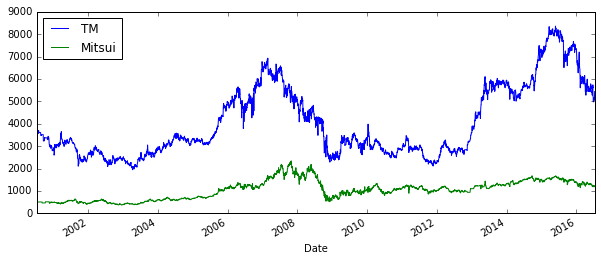

In [3]:
#株価データの可視化
toyota['Adj Close'].plot(legend = True, label = "TM ", figsize = (10,4))                         #Adj Close = 調整後終値
Mitsui['Adj Close'].plot(legend = True,label = "Mitsui" ,figsize = (10,4)) 

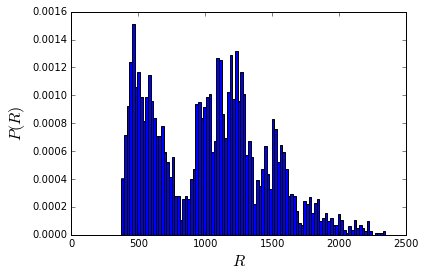

In [4]:
#ヒストグラムの作成
R = Mitsui['Adj Close']                                             # R に株価を格納
plt.hist(R, bins=100,normed=True) 
plt.xlabel(r'$R$', fontsize=16)
plt.ylabel(r'$P(R)$', fontsize=16)
#plt.legend([r'Gauss',r'histgram'], fontsize=14)
plt.show() 
#print(len(R))

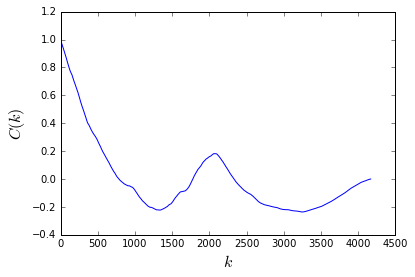

In [5]:
#平均の計算
N = len(R)
sum =0
for i in range(N):
    sum = sum + R[i] 
ave = sum/N 
#print(ave)

#自己相関関数
def auto_correlate(dt):
    cor = np.correlate(dt,dt,mode="full")
    return cor[N-1:]
corr = np.zeros(N)
corr=auto_correlate(R - ave)/N
plt.plot(corr/corr[0])
#plt.xlim(-100,1000)
#plt.ylim(-0.2,1.2)
plt.xlabel(r'$k$', fontsize=16)
plt.ylabel(r'$C(k)$', fontsize=16)
plt.show()

(0.18267016601562497, 32.044517856508733)


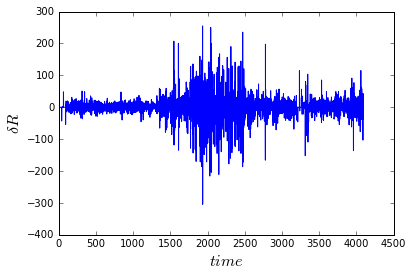

In [6]:
# 日ごとの株価変化"dR"を見てみよう

N = 4096                                                                   #株価偏差のデータ数　N = (2のべき乗 )にする。のちのフーリエ変換のため
dR = np.zeros(N)

sum = 0
for i in range(N):
    dR[i] = R[i +1] - R[i]                          
    sum = sum + dR[i]                                             
ave0 = sum/N                                                           #平均の計算

dmy_sum = 0
for i in range(N):
    dmy_sum = dmy_sum + (dR[i] - ave0) ** 2
std = ( dmy_sum /N )**0.5                                    #標準偏差の計算

plt.plot(dR)
plt.xlabel(r'$time$', fontsize=16)
plt.ylabel(r'$\delta R$', fontsize=16)
#print(len(dR))
print(ave0,std)

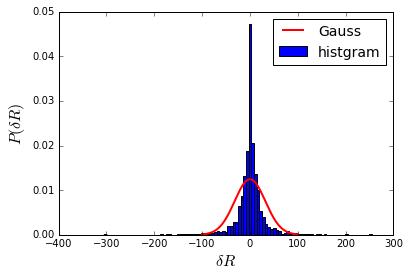

In [10]:
#株価変化のヒストグラム
plt.hist(dR, bins=100,normed=True)    # Rに格納された乱数の分布を100本の棒グラフにする．さらに総面積が1になるよう規格化
x = np.arange(-100, 100, 0.01)           # -100から100の範囲を間隔0.01で刻み，配列xに保存
y = np.exp(-(x-ave0)**2/2/std**2)/np.sqrt(2*np.pi*std**2) # 配列xと同じ数だけ正規分布の理論値を配列yに保存
plt.plot(x, y, lw=2, color='r')                 # x vs. yを線幅2の赤い線で描く
plt.xlabel(r'$\delta R$', fontsize=16)
plt.ylabel(r'$P(\delta R)$', fontsize=16)
plt.legend([r'Gauss',r'histgram'], fontsize=14)

plt.show()                           # 上記のグラフをまとめて1つの図に出力

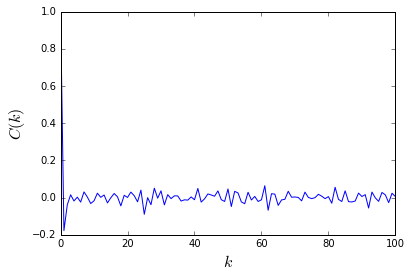

In [8]:
#自己相関関数
def auto_correlate(dt):
    cor = np.correlate(dt,dt,mode="full")
    return cor[N - 1:]
corr = np.zeros(N)
corr=auto_correlate(dR - ave0)/N
plt.plot(corr/corr[0])
plt.xlim(0,100)
#plt.ylim(-2000,5000)
plt.xlabel(r'$k$', fontsize=16)
plt.ylabel(r'$C(k)$', fontsize=16)
plt.show()
#print(dR)

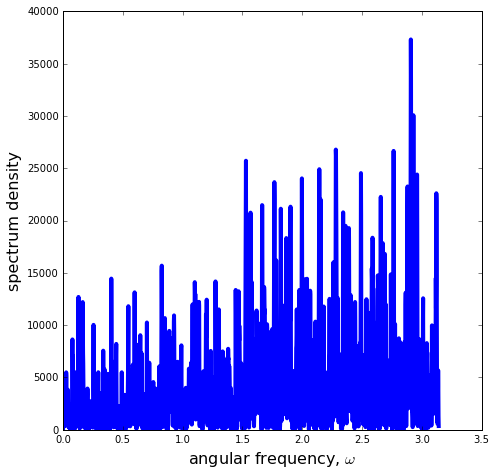

In [9]:
#スペクトル密度
dt = 1.
# power spectrum for V
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"angular frequency, $\omega$", fontsize=16)
ax.set_ylabel(r"spectrum density", fontsize=16)
X = np.zeros(N)
Y = np.zeros(N)
omega=np.zeros(N) 
X= dR[0:N] -ave0
Y,omega=mlab.psd(X,NFFT=4096, Fs=1./dt,noverlap=4096/2)
ax.plot(omega*2*np.pi,Y,'b',lw=4)           # 0 < omega [Hz] < \infty

plt.show()